In [2]:
## Question 4 of the homework
## Current code works but is messy and inefficient; spent time doing this homework familiarizing
## myself with numpy and matrix mathematics in python (as opposed to developing beautiful code)
##
## Future homeworks will be formatted better and cleaner

import math
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

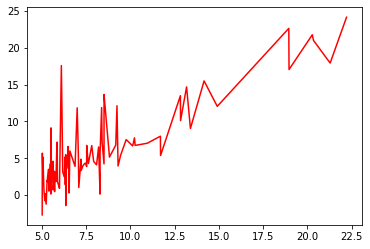

In [3]:
## 4.1) Extract data from .txt file, then sort x-y pairs based on x value
## while preserving correlation for better graphing.
pairs = []
with open ('data2.txt') as f:
    for row in f:
        pairs += [[float(row.split(',')[0]),float(row.split(',')[1])]]
f.close()
pairs.sort(key = lambda x: x[0])

X = [pair[0] for pair in pairs]
Y = [pair[1] for pair in pairs]

plt.plot(X, Y, 'r')
plt.show()

In [142]:
## 4.2) Normal equation solution for coefficients. Start by formatting
## data as np.array. Appending ones is required for bias term

X = np.array(X)
Y = np.array(Y).reshape(-1,1)
X_b = np.c_[np.ones((len(X), 1)), X]

w = inv(X_b.transpose().dot(X_b)).dot(X_b.transpose()).dot(Y)
err = np.sum(np.power(X_b.dot(w)-Y,2))/len(X_b)

print("Minimum possible error: " + str(err)+"\n")
print("w1: " + str(w[0][0]) + "\nw2: " + str(w[1][0]))

Minimum possible error: 8.953942751950358

w1: -3.89578087831187
w2: 1.1930336441895948


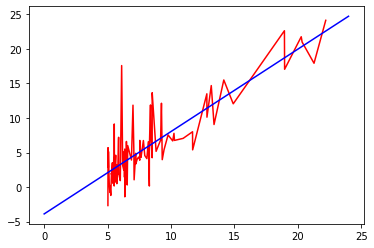

In [5]:
## Generate list of x values to calculate y from in order to visualize
## fit of model.
x_pred = np.array([i for i in range(0,25)])
x_pred_b = np.c_[np.ones((len(x_pred),1)),x_pred]
y_pred = x_pred_b.dot(w)

plt.plot(X,Y,'r', x_pred, y_pred, 'b')

Error: [8.95527854]
Learning Rate: [0.00024362]
Number of Epochs: [900.]
w0: [-3.81049341]
w1: [1.18446559]


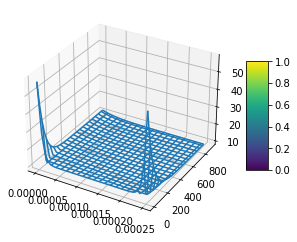

In [144]:
## 4.3) Find w using batch and stochastic descent
## Batch

w_hold = np.array(np.zeros((5,1)))
w_hold[0] = 100000
Err_rates = []
Err_ite = []

rates = np.linspace(0.000001, 0.00025, 40)
num_epochs = np.linspace(10, 900, 40)

for epoch in num_epochs:
    Err_rates = []
    for rate in rates:
        w=np.array(np.zeros((2,1)))
        for step in range(0,int(epoch)):
            err = (X_b.dot(w)-Y)
            w -= rate*np.dot(err.T, X_b).T
        
        if np.sum(np.power(err,2))/len(X_b) < w_hold[0]:
            w_hold[0] = np.sum(np.power(err,2))/len(X_b)
            w_hold[1] = rate
            w_hold[2] = epoch
            w_hold[3] = w[0]
            w_hold[4] = w[1]
        
        Err_rates += [np.sum(np.power(err,2))/len(X_b)]
    Err_ite += [Err_rates]

labels = ["Error: ", "Learning Rate: ", "Number of Epochs: ", "w0: ", "w1: "]
for i in range(0,len(w_hold)):
    print(labels[i] + str(w_hold[i]))

Err_ite = np.array(Err_ite)
x, y = np.meshgrid(rates, num_epochs)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_wireframe(x, y, Err_ite, rstride=2, cstride=2)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Error: [9.43073976]
Learning Rate: [0.00037778]
Number of Epochs: [1000.]
w0: [-3.88998708]
w1: [1.19174527]


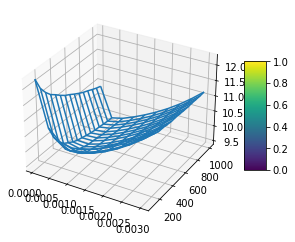

In [149]:
## 4.3) Find w using batch and stochastic gradient descent
## Stochastic

## 

indices = np.array([i for i in range(0,len(X_b))])

w_hold = np.array(np.zeros((5,1)))
w_hold[0] = 100000

Err = 0
Err_rates = []
Err_ite = []

rates = np.linspace(0.00005, 0.003, 10)
num_epochs = np.linspace(100, 1000, 15)

#rates = [0.00055]
#num_epochs = [400]

for epoch in num_epochs:
    Err_rates = []
    for rate in rates:
        w=np.array(np.zeros((2,1)))
        for step in range(0,int(epoch)):
            for ind in indices:
                xi = X_b[ind].reshape(-1,1)
                yi = Y[ind].reshape(-1,1)
                err = float(xi.T.dot(w)-yi)
                Err += np.power(err,2)*(1/len(indices))
                w -= rate*err*xi
        if Err/epoch < w_hold[0]:
            w_hold[0] = Err/epoch
            w_hold[1] = rate
            w_hold[2] = epoch
            w_hold[3] = w[0]
            w_hold[4] = w[1]
        Err_rates += [Err/epoch]
        Err = 0
    Err_ite += [Err_rates]
    
for i in range(0,len(w_hold)):
    print(labels[i] + str(w_hold[i]))

Err_ite = np.array(Err_ite)
x, y = np.meshgrid(rates, num_epochs)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_wireframe(x, y, Err_ite, rstride=1, cstride=1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Left -> Right is learning rate
Bottom -> Top is number of epochs
Low Altitude -> High Altitude is error

Optimal hyperparameters can be found above.

As seen by the surface, the topology of the function is far more generalized compared to the batch gradient descent; this is reflective of SGD being better at finding global minima as opposed to local minima. In general, it has a more gradual slope, resulting in a slower (~2-3 minutes) algorithm but one that converges better and more consistently. It is expected that with more trials the error will decrease even further.